In [1]:
from random import *
import math
import random
import array
import matplotlib.pyplot as plt
import numpy as np
import copy
MIN_COOR = 0
MAX_COOR = 180

In [2]:
# W ten sposób przechowywane będą współrzędzne miast
class Coordinates:
  def __init__(self, x, y):
    self.x = x
    self.y = y

In [3]:
# Monte Carlo

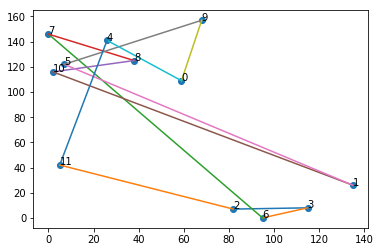

In [4]:
# Losuj miasta
cities_monte_carlo = []
for j in range(0,12):
    cities_monte_carlo.append(Coordinates(randint(MIN_COOR, MAX_COOR), randint(MIN_COOR, MAX_COOR)))
# Losowa droga
city_indexes_monte_carlo = array.array('q', [0, 1 ,2 ,3 , 4, 5, 6, 7, 8, 9, 10, 11]) 
city_indexes_monte_carlo = array.array('q', random.sample(list(city_indexes_monte_carlo), 12))
city_indexes_monte_carlo.append(city_indexes_monte_carlo[0]) 

# Odleglosci
distances_monte_carlo = []
for i in range(0, 12):
    distances_monte_carlo.append([])
    for j in range(0, 12):
        distances_monte_carlo[i].append(0 if i == j else math.sqrt((cities_monte_carlo[i].x - cities_monte_carlo[j].x)**2 + (cities_monte_carlo[i].y - cities_monte_carlo[j].y)**2))
        
# Dlugosc poczatkowa
def calculate_route(city_indexes):
    result = 0
    for i in range(0, 12):
        result = result + distances_monte_carlo[city_indexes_monte_carlo[i]][city_indexes_monte_carlo[i + 1]]
    return result
rout_length_monte_carlo = calculate_route(city_indexes_monte_carlo)

#Tworzone obiekty z najlepszymi wartościami
city_indexes_monte_carlo_best = city_indexes_monte_carlo
rout_length_monte_carlo_best = rout_length_monte_carlo
for i in range(0, 100): #run 10 times, in each loop change city_indexes_monte_carlo and calculate route
    #losowanie dwóch indeksów
    first_index = randint(0, 12)
    second_index = randint(0, 12)
    if first_index == second_index:
        break # indeksy muszą się różnic
    first_city = city_indexes_monte_carlo[first_index]
    second_city = city_indexes_monte_carlo[second_index]
    if first_index == 0 or first_index == 12: 
        #Sprawdzenie czy któryś z wylosowanych indeksów nie jest z początku/końca - jeśli tak to trzeba wykonać podwójną zamianę
        city_indexes_monte_carlo[0] = second_city
        city_indexes_monte_carlo[12] = second_city
        city_indexes_monte_carlo[second_index] = first_city
    if second_index == 0 or second_index == 12:
        city_indexes_monte_carlo[0] = first_city
        city_indexes_monte_carlo[12] = first_city
        city_indexes_monte_carlo[first_index] = second_city
    else: #Gdy taka sytacja nie zachodzi, dokonywana jest zwykła zamiana miejscami
        city_indexes_monte_carlo[first_index] = second_city 
        city_indexes_monte_carlo[second_index] = first_city
    rout_length_monte_carlo = calculate_route(city_indexes_monte_carlo) #Obliczana jest długość trasy
    if rout_length_monte_carlo < rout_length_monte_carlo_best: #Jeżeli jest mniejsza niż najlepsza, 
        #to następuje nadpisanie najlepszej trasy i ułożenia indeksów
        rout_length_monte_carlo_best = rout_length_monte_carlo
        city_indexes_monte_carlo_best = city_indexes_monte_carlo
    else: #jeśli nie to ponownie wracamy do prób modyfikowania najlepszej trasy
        rout_length_monte_carlo = rout_length_monte_carlo_best
        city_indexes_monte_carlo = city_indexes_monte_carlo_best


#Zapisuję współrzędne do list
wspx_monte_carlo = []
wspy_monte_carlo = []
for i in range(0,12):
    wspx_monte_carlo.append(cities_monte_carlo[i].x)
    wspy_monte_carlo.append(cities_monte_carlo[i].y)  

plt.scatter(wspx_monte_carlo, wspy_monte_carlo) #i je plotuję
for i in range(0, 12):
    plt.annotate(i,(cities_monte_carlo[i].x, cities_monte_carlo[i].y)) #dodanie podpisów
    plt.plot((wspx_monte_carlo[city_indexes_monte_carlo_best[i]],wspx_monte_carlo[city_indexes_monte_carlo_best[i+1]]),(wspy_monte_carlo[city_indexes_monte_carlo_best[i]],wspy_monte_carlo[city_indexes_monte_carlo_best[i+1]]))  
    #narysowanie trasy

In [5]:
#Funkcja, która wybiera n najlepszych osobników (pod względem długości trasy - najktórsza trasa = najlepszy osobnik)
def select_n_best(n, pop_cities, pop_distances, pop_rout_length):
    population_cities_copy = copy.deepcopy(pop_cities)
    population_distances_copy = copy.deepcopy(pop_distances)
    population_rout_length_copy = copy.deepcopy(pop_rout_length)
    population_cities_start = []
    population_distances_start = []
    population_rout_length_start = []
    
    for i in range(n):
        index = population_rout_length_copy.index(min(population_rout_length_copy))
        population_cities_start.append(population_cities_copy[index])
        population_distances_start.append(population_distances_copy[index])
        population_rout_length_start.append(population_rout_length_copy[index])
        population_cities_copy.pop(index)
        population_distances_copy.pop(index)
        population_rout_length_copy.pop(index)
    
    #Zwracane zostają najlepsze kolejności, dystanse oraz długości tras
    return (population_cities_start, population_distances_start, population_rout_length_start)

In [6]:
# Ruletka
# prawdopodobieństwo = wartość przystosowania danego osobnika / suma wartości przystosowania wszystkich osobników
#Funkcja, która wybiera dwóch najlepszych rodziców spośród pewnej populacji
def select_parents(population_rout_length_start):
    all_value = 0
    for i in population_rout_length_start:
        all_value = all_value + i
    probability = []
    for i in population_rout_length_start:
        probability.append( 1 - i / all_value) # 1 - ... we want best parent with shortest route
    first_index = (random.choices(range(0, len(population_rout_length_start)), probability))
    second_index = (random.choices(range(0, len(population_rout_length_start)), probability))
    while True:
        if first_index == second_index:
             second_index = (random.choices(range(0, len(population_rout_length_start)), probability))
        else:
            break
    return [first_index, second_index]


# Krzyżowanie
def krzyzowanie(parent_A, parent_B, p):
    child = []
    pkt = p
    for i in range(0,pkt):
        child.append(parent_A[i])
    # Pozostałe elementy z B
    for i in parent_B:
        if not i in child:
            child.append(i)
    child.append(child[0])
    return child


# Mutacja - zamien dwa miasta miejscami
def mutacja(obj_A):
    length = len(obj_A) - 1
    first_index = randint(0, length)
    second_index = randint(0, length)
    
    #Sprawdzamy, czy indeksy nie są sobie równe, by zamiana miała sens
    while first_index == second_index:
        second_index = randint(0, length)
    
    first_value = obj_A[first_index]
    second_value = obj_A[second_index]
    
    #Rozważane są przypadki:
    # 1)gdy pierwszy indeks jest początkiem lub końcem a drugi jest gdzieś w środku
    # wtedy trzeba wykonać podwójną zamianę, ponieważ wynika to z przyjętego przez nas sposobu
    # przedstawienia osobnika (pierwsze miasto jest również na końcu), więc zamieniając pierwsze
    # trzeba zamienić również ostatnie i na odwrót
    if (first_index == 0 and second_index != length) or (first_index == length and second_index != 0): 
        obj_A[0] = second_value
        obj_A[length] = second_value
        obj_A[second_index] = first_value
    # 2)gdy drugi indeks jest początkiem lub końcem a pierwszy jest gdzieś w środku - sytuacja analogiczna
    # jak powyżej
    elif (second_index == 0 and first_index != length) or (second_index == length and first_index != 0):
        obj_A[0] = first_value
        obj_A[length] = first_value
        obj_A[first_index] = second_value
    # Każda inna zamiana
    else:
        obj_A[first_index] = second_value 
        obj_A[second_index] = first_value   
    return obj_A

## Algorytm genetyczny

In [112]:
#Algorytm genetyczny

#Losuje nowe 12 miast
cities_individual = [] 
for j in range(0,12):
    cities_individual.append(Coordinates(randint(MIN_COOR, MAX_COOR), randint(MIN_COOR, MAX_COOR)))

    
#Tworzę zmienne odnoszące się do populacji     
population_cities = []
population_distances = []
population_rout_length = []
population_values = []

#Funkcja, która oblicza dla przekazanego osobnika długość trasy
def calculate_route_gen(city_idx_ind, dist_ind):
    result = 0
    for i in range(0, 12):
        result = result + dist_ind[city_idx_ind[i]][city_idx_ind[i + 1]]
    return result

#Tworzę 12 osobników - list indeksów (12 losowych kolejności miast)
for licznik in range(12): 

    # Losowa droga
    city_indexes_individual = array.array('q', [0, 1 ,2 ,3 , 4, 5, 6, 7, 8, 9, 10, 11]) 
    city_indexes_individual = array.array('q', random.sample(list(city_indexes_individual), 12))
    #Wspomniane wcześniej dodanie pierwszego miasta na koniec
    city_indexes_individual.append(city_indexes_individual[0]) 

    # Odleglosci
    distances_individual = []
    for i in range(12):
        distances_individual.append([])
        for j in range(12):
            distances_individual[i].append(0 if i == j else math.sqrt((cities_individual[i].x - cities_individual[j].x)**2 + (cities_individual[i].y - cities_individual[j].y)**2))

    rout_length_individual = calculate_route_gen(city_indexes_individual, distances_individual)
    population_cities.append(city_indexes_individual) #kolejność miast
    population_distances.append(distances_individual) #macierz odległości
    population_rout_length.append(rout_length_individual) #całkowita długość trasy
    population_values.append(cities_individual) #miasta - współrzędne
    

#Głowna pętla
for generacja in range(15):
    
    # Selekcja - wybór 10 najlepszych osobników
    population_cities_start = []
    population_distances_start = []
    population_rout_length_start = []
            
    (population_cities_start,population_distances_start,population_rout_length_start) = select_n_best(10,population_cities,population_distances,population_rout_length)
    
    #Utworzenie 10 potomków
    parents = []
    children = []
    for k in range(10):
        parents = select_parents(population_rout_length_start)
        cross_point = randint(2,11) #losuje z przedziału 2 do 11, żeby ten punkt krzyżowania był w środku osobnika
        children.append(krzyzowanie(population_cities_start[parents[0][0]], population_cities_start[parents[1][0]],cross_point))
    
    #Mutowanie
    prawd_mutacji = 0.5
    for k in range(10):
        prawd = random.random()
        if prawd < prawd_mutacji:
            children[k] = mutacja(children[k])
    
    #Obliczanie odległości dla każdego z potomków
    children_cities = []
    children_distances = []
    children_rout_length = []
    population_values = []
    nowa_gen = []
    for i in range(10):
        rout_length_child = calculate_route_gen(children[i], distances_individual)
        children_cities.append(children[i]) #kolejność miast
        children_distances.append(distances_individual) #macierz odległości
        children_rout_length.append(rout_length_child) #całkowita długość trasy
        population_values.append(cities_individual) #miasta - współrzędne
    
    children6_cities = []
    children6_distances = []
    children6_rout_length = []
    
    #Wybór 6 najlepszych potomków
    (children6_cities,children6_distances,children6_rout_length) = select_n_best(6,children_cities,children_distances,children_rout_length)

    parents6_cities = []
    parents6_distances = []
    parents6_rout_length = []
    
    #Wybór 6 najlepszych rodziców
    (parents6_cities,parents6_distances,parents6_rout_length) = select_n_best(6,population_cities,population_distances,population_rout_length)
    
    #Stworzenie nowej populacji skladającej się z wybranych wczesniej 6 potomków i 6 rodziców
    gen_rout_length = parents6_rout_length + children6_rout_length
    gen_distances = parents6_distances + children6_distances
    gen_cities = parents6_cities + children6_cities
    
    population_cities = gen_cities
    population_distances = gen_distances
    population_rout_length = gen_rout_length
    

#Wybór najlepszej drogi po 15 generacjach
(best_cities, best_dist, best_rout_len) = select_n_best(1, population_cities, population_distances, population_rout_length)
print("Kolejność zapewniająca najkrótkszą drogę: ",best_cities)
#print(best_dist)
print("Długość najkrótszej drogi po 15 generacjach: ",best_rout_len)


Kolejność zapewniająca najkrótkszą drogę:  [[4, 3, 6, 10, 2, 5, 7, 11, 9, 1, 8, 0, 4]]
Długość najkrótszej drogi po 15 generacjach:  [453.75690594445604]


In [113]:
#Tworzenie listy współrzędnych x i y
wspx = []
wspy = []
for i in range(len(cities_individual)):
    wspx.append(cities_individual[i].x)
    wspy.append(cities_individual[i].y)  

wspx.append(wspx[0])
wspy.append(wspy[0])
print(wspx)
print(wspy)

[94, 130, 74, 76, 85, 18, 77, 40, 112, 138, 84, 123, 94]
[4, 90, 65, 95, 34, 97, 105, 108, 61, 87, 71, 71, 4]


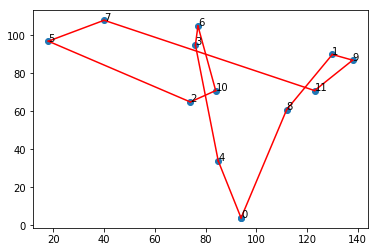

In [114]:
plt.scatter(wspx, wspy) #plot współrzędnych
for i in range(len(cities_individual)):
    plt.annotate(i,(cities_individual[i].x, cities_individual[i].y)) #dodanie etykiet miast
    plt.plot((wspx[best_cities[0][i]],wspx[best_cities[0][i+1]]),(wspy[best_cities[0][i]],wspy[best_cities[0][i+1]]), c='red')  
    #narysuj drogę pomiędzy współrzędnymi miast i oraz i+1 z przyjętej kolejności (city_indexes)
plt.show()